In [1]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid13/yolov8_vid13.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object

In [2]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid13/yolov5-vid13.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [3]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid13/yolov3_vid13.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()


In [4]:
#detectron

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid13/detectron_13.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_det_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_det_df)

            Object  Confidence
0         backpack    0.668112
1     baseball bat    0.063510
2   baseball glove    0.050068
3            bench    0.098338
4          bicycle    0.089688
5             bird    0.067422
6             book    0.095815
7           bottle    0.066285
8              car    0.956991
9       cell phone    0.071218
10           chair    0.126591
11           clock    0.352931
12             cup    0.067293
13             dog    0.115140
14    fire hydrant    0.062766
15         handbag    0.514598
16            kite    0.089428
17      motorcycle    0.117371
18   parking meter    0.074169
19          person    0.998235
20          remote    0.061385
21      skateboard    0.170330
22     sports ball    0.169633
23       stop sign    0.146134
24        suitcase    0.135008
25       surfboard    0.114899
26             tie    0.154044
27   traffic light    0.079246
28           truck    0.058475
29        umbrella    0.117724
30      wine glass    0.077258


In [5]:
#SSD

import pandas as pd

# Replace the path with your actual file path
file_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/csvfiles/vid13/vid13-ssd.csv'
necessary_objects_path = 'https://raw.githubusercontent.com/rupaut98/img-det-benchmark/main/classesForSSD.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame Number', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_ssd_df = unique_detections_df.groupby('Object')['Confidence Score'].mean().reset_index()

necessary_objects_df = pd.read_csv(necessary_objects_path)

filtered_mean_confidence_ssd_df = mean_confidence_ssd_df[mean_confidence_ssd_df['Object'].isin(necessary_objects_df['Objects'])]

In [6]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df
df4 = filtered_mean_confidence_ssd_df
df5 = mean_confidence_det_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist() +
                           df4['Object'].tolist() + df5['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.merge(df4, on='Object', how='left').rename(columns={'Confidence Score': 'Confidence_4'})
combined_df = combined_df.merge(df5, on='Object', how='left').rename(columns={'Confidence': 'Confidence_5'})
combined_df = combined_df.fillna(0)

combined_df = combined_df[:12]
print(combined_df)
# Now combined_df has one column for objects and three columns for confidences

           Object  Confidence_1  Confidence_2  Confidence_3  Confidence_4  \
0        backpack      0.406967      0.345027      0.402954      0.307904   
1             car      0.620986      0.637610      0.638485      0.573969   
2             cup      0.294780      0.000000      0.000000      0.000000   
3         handbag      0.475681      0.456583      0.489268      0.377644   
4          person      0.894753      0.880819      0.888568      0.683659   
5     sports ball      0.589513      0.462627      0.000000      0.269318   
6        suitcase      0.447684      0.479175      0.510469      0.000000   
7   tennis racket      0.307169      0.000000      0.000000      0.000000   
8        umbrella      0.275623      0.000000      0.000000      0.277349   
9           clock      0.000000      0.289676      0.000000      0.212289   
10        frisbee      0.000000      0.000000      0.286980      0.000000   
11          bench      0.000000      0.000000      0.000000      0.261870   

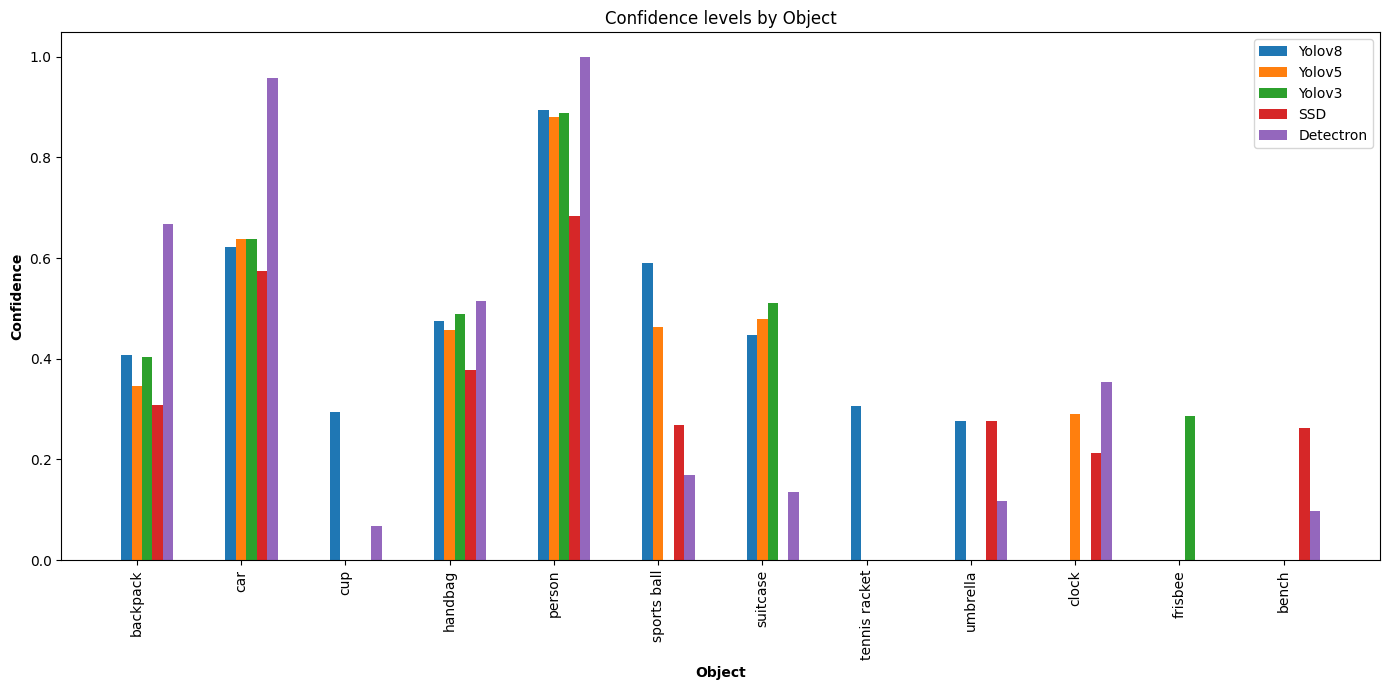

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.10

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')
plt.bar(index + 3*bar_width, combined_df['Confidence_4'], width=bar_width, label='SSD')
plt.bar(index + 4*bar_width, combined_df['Confidence_5'], width=bar_width, label='Detectron')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')


# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()